# Satellite Functions!
The purpose of this notebook is to share my knowledge on how to play around with the Satellite Data!

The Satellite Data can be found here:

http://water.ccny.cuny.edu/pubs/irina/goes13/

Please pay close attention to the files you download! If you look close enough you will realize that the files come in bunches of 5. Example:

goes13.2017.182.001519.BAND_01.nc size: 30M
goes13.2017.182.001519.BAND_02.nc size: 124k
goes13.2017.182.001519.BAND_03.nc size: 124k
goes13.2017.182.001519.BAND_04.nc size: 124k
goes13.2017.182.001519.BAND_05.nc size: 124k

These all correspond to the same image. Band_01 is what i call the HD picture. It displays clouds very nicely and even the shadows cast on the earth by the clouds. The rest of the bands are super low resolution versions of the image. I recommend you look at all bands of the same image so you get a better understanding. All bands are different.

# Anaconda Navigator!
It was strongly recommended by prof Grossberg that we use the Anaconda Navigator to install "outside" packages. In order to play around with this data you will need a package called "netcdf4"

Simply follow these steps to get it without any issues-

1) Load up the Anaconda Navigator
2) Click on the Environments tab on the left hand side
3) Click on the down arrow next to the "Installed" drop down menu
4) Click on "Not Installed"
5) In the Search Package box type in "net"
6) There should be a package called netcdf4
7) Check the box, click apply, and wait!

# Congratulations!
You should now be able to use some of the functions below to help you get started with this satellite data!

In [1]:
# MANDATORY IMPORTS!
from netCDF4 import Dataset # This is the package you just got
import numpy as np # just import it
import matplotlib.pyplot as plt # simple display
%matplotlib inline

In [2]:
def sat_display(filepath, style='gray'):
    """
    filepath is just the path to the satellite data ending in extension ".nc"
    style is just a variable used for cmap. It is defaulted to "gray" for grayscale images.
    This function displays the image hidden inside the file
    """
    
    nc_fid = Dataset(filepath, 'r') # "opening" the satellite data file 
    #print(nc_fid) # this should print out all the information of the file, similar to a pandas dataframe
    data = nc_fid.variables['data'][:] # extracting the data we want from the file
    #print(data) # this should print out a 3D array where data(time, y, x)
    # time has size 1 in this case so we can easily get a 2D array by using data[0]
    plt.imshow(data[0], cmap=style, origin='lower')
    nc_fid.close() # closing the file after using it

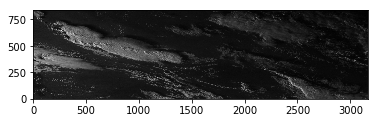

In [3]:
# here is an example
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_01.nc' # filepath
sat_display(nc_f)

In [4]:
def sat_array(filepath):
    """
    filepath is just the path to the satellite data ending in extension ".nc"
    This function returns a 2D array of the satellite data provided
    """
    nc_fid = Dataset(filepath, 'r')
    data = nc_fid.variables['data'][:]
    nc_fid.close()
    return data[0]

In [5]:
data = sat_array(nc_f)
print("The type of this is:", type(data))
print("The shape of this numpy.ndarray is:", np.shape(data))
print(data)

The type of this is: <class 'numpy.ndarray'>
The shape of this numpy.ndarray is: (840, 3168)
[[ 2368.  2336.  2368. ...,  1952.  1760.  1920.]
 [ 2432.  2464.  2432. ...,  2080.  2016.  2048.]
 [ 2464.  2496.  2464. ...,  1760.  1760.  1920.]
 ..., 
 [ 2784.  2816.  2944. ...,  1024.  1024.  1056.]
 [ 2784.  2752.  2720. ...,  1024.   928.   992.]
 [ 2560.  2560.  2688. ...,  1152.  1056.  1024.]]
